In [19]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import pickle


In [2]:
model_df = pd.read_csv('../data/new_df.csv')

In [4]:
x=model_df.drop(columns="Outcome",axis=1)
y=model_df["Outcome"]

In [5]:
scale=StandardScaler()
x=scale.fit_transform(x)

In [6]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=0)

In [7]:
SVM=SVC(kernel="linear")
SVM.fit(x_train,y_train)

SVC(kernel='linear')

In [8]:
SVM_pred=SVM.predict(x_test)
SVM_pred

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [9]:
print("Classification  Report : \n ",classification_report(y_test,SVM_pred))

Classification  Report : 
                precision    recall  f1-score   support

           0       0.82      0.92      0.87        89
           1       0.77      0.57      0.66        42

    accuracy                           0.81       131
   macro avg       0.80      0.75      0.76       131
weighted avg       0.81      0.81      0.80       131



In [12]:
print("Accuracy  : \n ",accuracy_score(y_test,SVM_pred))

Accuracy  : 
  0.8091603053435115


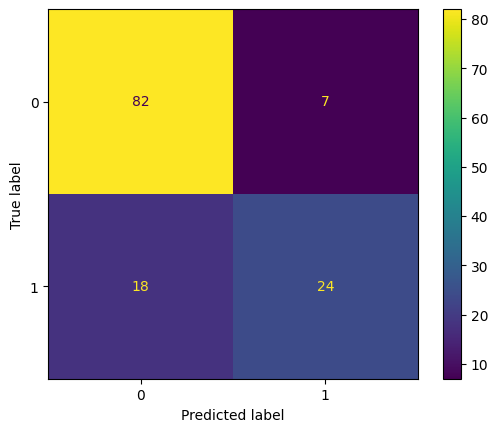

In [17]:
cm=confusion_matrix(y_test,SVM_pred)
p=ConfusionMatrixDisplay(confusion_matrix=cm)
p.plot()
plt.show()

In [20]:
with open('svm_model.pkl', 'wb') as model_file:
    pickle.dump(SVM, model_file)